# Mall Customer Segmentation

## Introduction
This project focuses on customer segmentation for mall customers using unsupervised machine learning with K-Means clustering. The goal is to identify different customer groups based on age, annual income, and spending score, allowing businesses to target marketing strategies effectively.

The dataset can be found here: [https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

## Data Exploration

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The dataset contains the following columns:

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Customer's gender.
- **Age**: Customer's age.
- **Annual Income (k$)**: Customer's annual income in thousand dollars.
- **Spending Score (1-100)**: Score assigned based on customer behavior and purchasing patterns.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
plt.style.use("ggplot")

# Summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


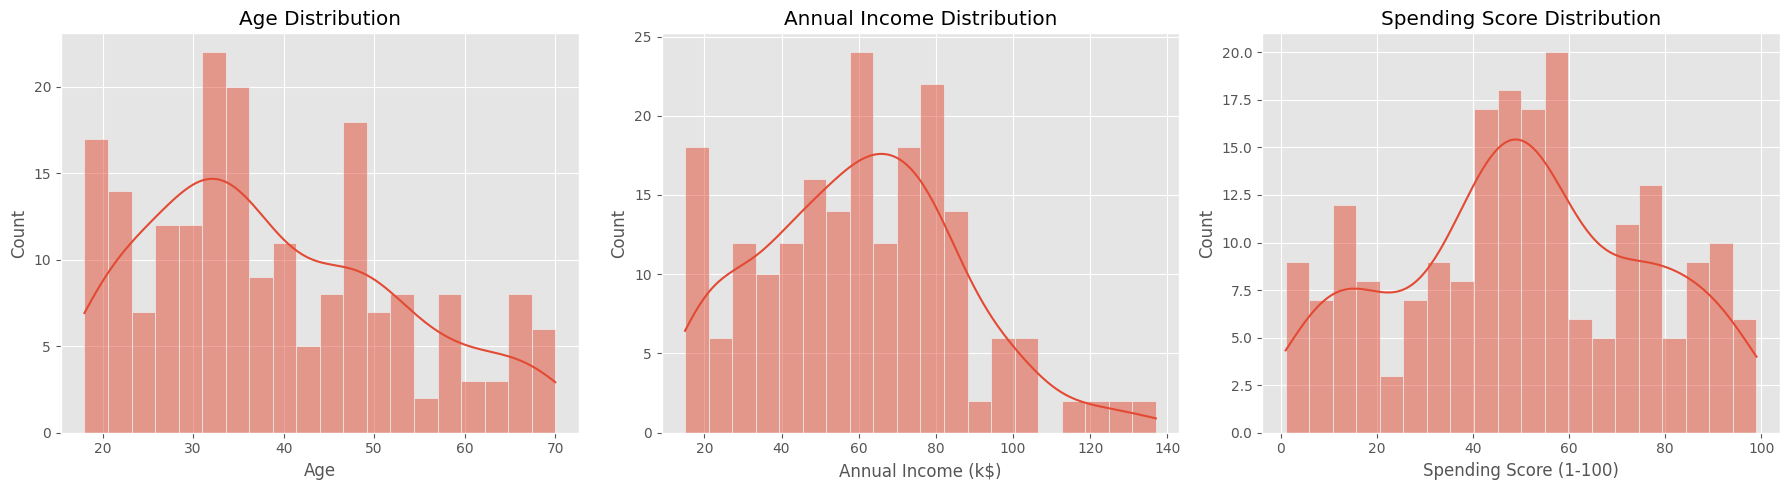

In [6]:
# Visualize distributions of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

# Annual Income distribution
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Annual Income Distribution")

# Spending Score distribution
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Spending Score Distribution")

# Show plots
plt.tight_layout()
plt.show()

## Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop CustomerID as it's not useful for clustering
df = df.drop(columns=["CustomerID"])

# Encode Gender column
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

# Standardize numerical features (except categorical ones like Gender)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["Age", "Annual Income (k$)", "Spending Score (1-100)"]] = scaler.fit_transform(
    df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


The dataset has been preprocessed, including encoding the categorical **Gender** column and standardizing the numerical features for better clustering performance.

## Customer Segmentation

c:\Users\niles\anaconda3\envs\wine_quality_eda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\niles\anaconda3\envs\wine_quality_eda\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\niles\anaconda3\envs\wine_quality_eda\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\niles\anaconda3\envs\wine_quality_eda\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\niles\anaconda3\envs\wine_quality_eda\lib\subprocess.py", line 1456, in _execute_child

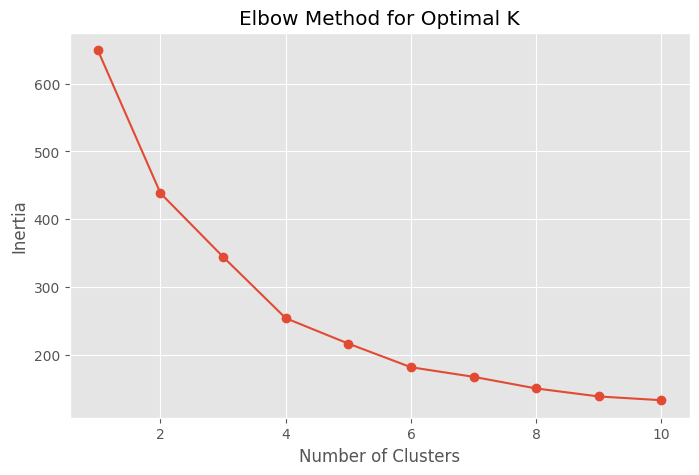

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Finding the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

The **Elbow Method** plot helps determine the optimal number of clusters by identifying the "elbow point," where the inertia starts decreasing at a slower rate.

## Visualization of Clusters

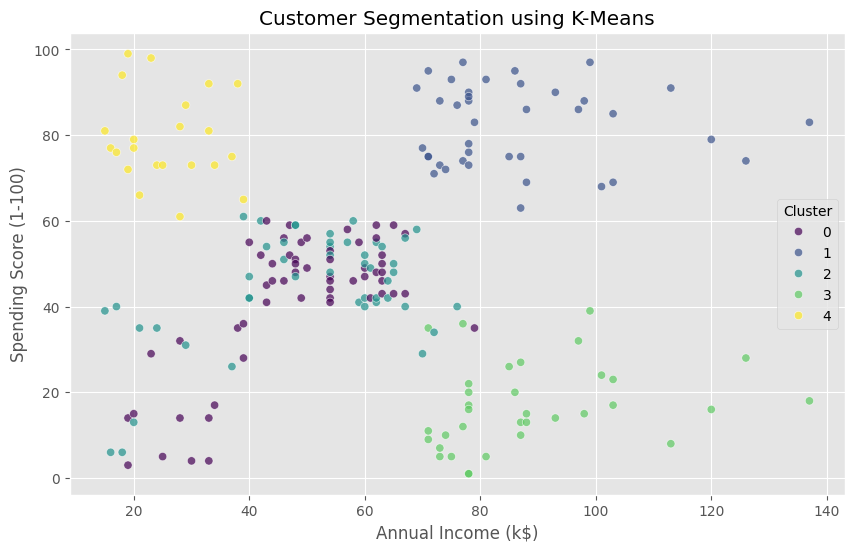

In [9]:
# Apply K-Means with the optimal number of clusters (k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Assign cluster labels to the original dataset
df["Cluster"] = df_scaled["Cluster"]

# Visualize the clusters in a 2D scatter plot using Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["Annual Income (k$)"], 
    y=df["Spending Score (1-100)"], 
    hue=df["Cluster"], 
    palette="viridis", 
    alpha=0.7
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend(title="Cluster")
plt.show()

The **K-Means clustering results** are visualized using a 2D scatter plot, where customers are grouped into **five clusters** based on **Annual Income** and **Spending Score**.

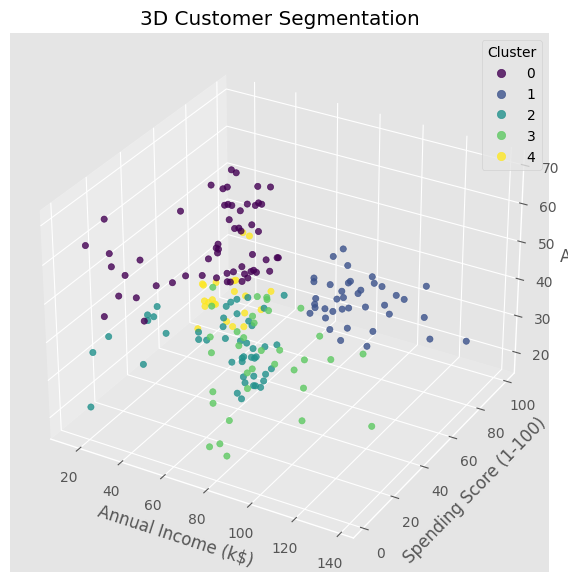

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot for better visualization of clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot
scatter = ax.scatter(
    df["Annual Income (k$)"], 
    df["Spending Score (1-100)"], 
    df["Age"], 
    c=df["Cluster"], 
    cmap="viridis", 
    alpha=0.8
)

# Labels and title
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Age")
ax.set_title("3D Customer Segmentation")

# Add legend
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

## Conclusion